In [1]:
# packages for data analysis
import numpy as np
import pandas as pd

# data visualizing

from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

# Load the data
totalShootings = pd.read_csv("Dec03Merged.csv",index_col=0)
# Indexing
totalShootings.index += 1 
totalShootings.index
totalShootings.index.name = 'index'

totalShootings['Incident Date'] = pd.to_datetime(totalShootings['Incident Date'])
totalShootings['year'] = totalShootings['Incident Date'].dt.year
totalShootings['month'] = totalShootings['Incident Date'].dt.month
totalShootings['day'] = totalShootings['Incident Date'].dt.day
totalShootings['weekday'] = totalShootings['Incident Date'].dt.weekday
totalShootings['loss'] = totalShootings['# Killed'] + totalShootings['# Injured']
totalShootings.sort_values(['year'], ascending = True, inplace = False)

# Lower case column names
totalShootings.columns = totalShootings.columns.str.lower()

# Renaming columns
totalShootings.rename(columns={'city or county':'city','# killed':'dead', '# injured':'injured'}, inplace=True)

# Not Null Data
totalShootings.notnull().sum()

# Dropping columns
totalShootings.drop(['operations','participant gender','participant name','participant age group'], axis=1, inplace=True)

totalShootings.head()



,incident id,incident date,state,city,address,dead,injured,crimetype,year,month,day,weekday,loss
index,,,,,,,,,,,,,
2001,NaN,2020-11-17,Kentucky,Louisville,10800 block of Sparrow Cir,NaN,NaN,Children,2020,11,17,1,NaN
2002,NaN,2020-11-16,Florida,Miami,200 block of S Biscayne River Dr,NaN,NaN,Children,2020,11,16,0,NaN
2003,NaN,2020-11-16,Florida,Miami,200 block of S Biscayne River Dr,NaN,NaN,Children,2020,11,16,0,NaN
2004,NaN,2020-11-16,Illinois,Chicago,200 block of W 115th St,NaN,NaN,Children,2020,11,16,0,NaN
2005,NaN,2020-11-16,Ohio,Columbus,2047 Bancroft St,NaN,NaN,Children,2020,11,16,0,NaN


['Texas', 'California', 'Illinois', 'Florida', 'Ohio', 'Pennsylvania', 'Missouri', 'North Carolina', 'Georgia', 'Michigan', 'Louisiana', 'New York', 'Tennessee', 'Virginia', 'Indiana', 'South Carolina', 'Kentucky', 'Arizona', 'Maryland', 'Alabama', 'Wisconsin', 'Mississippi', 'Colorado', 'Oklahoma', 'Washington', 'Nevada', 'Arkansas', 'Minnesota', 'Kansas', 'District of Columbia', 'New Jersey', 'Utah', 'New Mexico', 'Massachusetts', 'Iowa', 'Oregon', 'Connecticut', 'Delaware', 'Nebraska', 'West Virginia', 'Idaho', 'Montana', 'Alaska', 'New Hampshire', 'Maine', 'North Dakota', 'Vermont', 'Rhode Island', 'South Dakota', 'Wyoming']
[1198, 861, 808, 733, 587, 506, 492, 460, 458, 422, 421, 387, 361, 336, 327, 290, 272, 251, 235, 230, 228, 199, 197, 188, 151, 147, 141, 130, 128, 114, 112, 109, 107, 86, 85, 84, 67, 64, 60, 57, 40, 36, 27, 27, 24, 20, 15, 15, 13, 11]


<AxesSubplot:xlabel='state'>

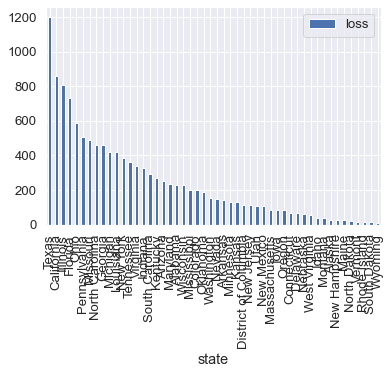

In [2]:
# function to aggregate the data and return keys and values
def bar_graph_data(col):
    aggregated = totalShootings[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values
x1, y1 = bar_graph_data('state')
x1 = x1[:-1]
print(x1)
y1 = y1[:-1]
print(y1)
stateWiseBar = pd.DataFrame({'state':x1, 'loss':y1})
stateWiseBar.plot.bar(x='state', y='loss')

In [3]:
# State specific analysis
row_count, column_count = totalShootings.shape

totalShootings.set_index('state')


totalShootings.sort_values(['loss'], ascending = False, inplace=True)
totalShootings.head()

californiaShootings = totalShootings[(totalShootings.state == 'California')]
californiaShootings.head()

# Top 10 Highest crime prone cities in California
california_city_loss_distib = californiaShootings.city.value_counts(sort=True).head(10)
print(california_city_loss_distib)

# Highest number of loss this year in California
# https://www.usatoday.com/story/news/nation/2020/09/09/7-killed-california-marijuana-operation/5755674002/
california_most_loss_distib = californiaShootings.loc[californiaShootings['loss'].idxmax()]
print("On "+str(california_most_loss_distib.month)+"/"+str(california_most_loss_distib.day)+"/"+str(california_most_loss_distib.year)+", %d"%california_most_loss_distib.loss,"people were affected by gun violence in the city of "+california_most_loss_distib.city+" ("+california_most_loss_distib.state+")")
print(california_most_loss_distib.address)

Los Angeles       59
Oakland           51
Fresno            43
Sacramento        33
Bakersfield       31
Stockton          27
San Diego         27
San Bernardino    22
San Francisco     15
Vallejo           15
Name: city, dtype: int64
On 9/7/2020, 7 people were affected by gun violence in the city of Aguanga (California)
45125 Highway 371


In [4]:
# Load the data
massShootings = pd.read_csv("Dec03Merged.csv")

# Indexing
massShootings.index += 1 
massShootings.index
massShootings.index.name = 'Index'

massShootings['Incident Date'] = pd.to_datetime(massShootings['Incident Date'])
massShootings['year'] = massShootings['Incident Date'].dt.year
massShootings['month'] = massShootings['Incident Date'].dt.month
massShootings['day'] = massShootings['Incident Date'].dt.day
massShootings['weekday'] = massShootings['Incident Date'].dt.weekday
massShootings['loss'] = massShootings['# Killed'] + massShootings['# Injured']
massShootings.sort_values(['year'], ascending = True, inplace = False)

# Lower case column names
massShootings.columns = massShootings.columns.str.lower()

# Renaming columns
massShootings.rename(columns={'city or county':'city','# killed':'dead', '# injured':'injured'}, inplace=True)

# Not Null Data
massShootings.notnull().sum()

# Dropping columns
massShootings.drop('operations', axis=1, inplace=True)

massShootings.head()

massShootings.to_csv(r'/Users/shruti/Capstone/ProcessedDec03.csv', index = False)

In [5]:
massShootings.sort_values(['year', 'month'], inplace=True)
massShootings.head(10)

,unnamed: 0,incident id,incident date,state,city,address,dead,injured,crimetype,participant gender,participant name,participant age group,year,month,day,weekday,loss
Index,,,,,,,,,,,,,,,,,
568,2567,NaN,2020-01-30,Louisiana,Bossier City,5000 block of Honeysuckle Ln,NaN,NaN,Children,NaN,NaN,Child 0-11,2020,1,30,3,NaN
569,2568,NaN,2020-01-30,New Jersey,Camden,300 block of Chestnut Ave,NaN,NaN,Children,NaN,NaN,Child 0-11,2020,1,30,3,NaN
570,2569,NaN,2020-01-30,Utah,Brigham City,NaN,NaN,NaN,Children,male,NaN,Child 0-11,2020,1,30,3,NaN
571,2570,NaN,2020-01-30,Utah,Salt Lake City (Murray),5200 S 800 E,NaN,NaN,Children,male,NaN,Child 0-11,2020,1,30,3,NaN
572,2571,NaN,2020-01-29,Wisconsin,Madison,N Lawn Ave and Dahle St,NaN,NaN,Children,NaN,NaN,Child 0-11,2020,1,29,2,NaN
573,2572,NaN,2020-01-29,Missouri,Saint Louis,2800 block of Gamble St,NaN,NaN,Children,male,NaN,Child 0-11,2020,1,29,2,NaN
574,2573,NaN,2020-01-28,Georgia,Augusta,1200 block of Brown Rd,NaN,NaN,Children,male,NaN,Child 0-11,2020,1,28,1,NaN
575,2574,NaN,2020-01-27,Ohio,Byesville,Meadowbrook Drive,NaN,NaN,Children,female,NaN,Child 0-11,2020,1,27,0,NaN
576,2575,NaN,2020-01-27,Illinois,Chicago,850 W Eastwood Ave,NaN,NaN,Children,male,NaN,Child 0-11,2020,1,27,0,NaN


In [6]:
# Get the total count of the types of crimes
massShootings.crimetype.value_counts(ascending=False)

Teens                                  2916
Homicide/Murder/Unintentional/DGU      2000
Unintentional Shooting                 1959
Officer Involved and Killed/Injured    1475
Defensive Use                          1232
Children                                870
Subject Suspect Killed/Injured          786
Mass Shootings                          567
Murder or Suicide                       505
Mass Murders                             16
Name: crimetype, dtype: int64

In [7]:
# Normalized values help with clear idea about the data 
massShootings.crimetype.value_counts(ascending=False, dropna=False, normalize=True)

Teens                                  0.236573
Homicide/Murder/Unintentional/DGU      0.162259
Unintentional Shooting                 0.158932
Officer Involved and Killed/Injured    0.119666
Defensive Use                          0.099951
Children                               0.070583
Subject Suspect Killed/Injured         0.063768
Mass Shootings                         0.046000
Murder or Suicide                      0.040970
Mass Murders                           0.001298
Name: crimetype, dtype: float64

In [8]:
massShootings.state.value_counts(ascending=False).head(10)

Texas             1198
California         861
Illinois           808
Florida            733
Ohio               587
Pennsylvania       506
Missouri           492
North Carolina     460
Georgia            458
Michigan           422
Name: state, dtype: int64

In [9]:
# Normalized values help with clear idea about the data 
massShootings.state.value_counts(ascending=False, dropna=False, normalize=True)

Texas                   0.097193
California              0.069852
Illinois                0.065552
Florida                 0.059468
Ohio                    0.047623
Pennsylvania            0.041051
Missouri                0.039916
North Carolina          0.037319
Georgia                 0.037157
Michigan                0.034237
Louisiana               0.034155
New York                0.031397
Tennessee               0.029288
Virginia                0.027259
Indiana                 0.026529
South Carolina          0.023528
Kentucky                0.022067
Arizona                 0.020363
Maryland                0.019065
Alabama                 0.018660
Wisconsin               0.018497
Mississippi             0.016145
Colorado                0.015982
Oklahoma                0.015252
Washington              0.012251
Nevada                  0.011926
Arkansas                0.011439
Minnesota               0.010547
Kansas                  0.010385
District of Columbia    0.009249
New Jersey

In [10]:
#  describe() gives us an overview of numerical columns
#  Majority of columns are categorical, so we use 'state' and 'crimetype' columns
cols = ['state', 'crimetype']
for col in cols:
    print(col + ':')
    print(massShootings[col].describe())
    print('-' * 20 + '\n')

state:
count     12326
unique       51
top       Texas
freq       1198
Name: state, dtype: object
--------------------

crimetype:
count     12326
unique       10
top       Teens
freq       2916
Name: crimetype, dtype: object
--------------------



In [11]:
# Get percentiles for state with highest crime and type of crime
percentiles = np.arange(0.1,1.1,0.1)
for col in cols:
    print(col + ':')
    print(massShootings[col][massShootings[col].notnull()].describe(percentiles=percentiles))
    print('-' * 20 + '\n')

state:
count     12326
unique       51
top       Texas
freq       1198
Name: state, dtype: object
--------------------

crimetype:
count     12326
unique       10
top       Teens
freq       2916
Name: crimetype, dtype: object
--------------------



In [12]:
# The underage teens and children who were affected by gun violence
teens_affected = massShootings[(massShootings['crimetype'] == 'Teens')].count()
children_affected = massShootings[(massShootings['crimetype'] == 'Children')].count()
#massShootings[(massShootings['crimetype'] == 'Teens') & (massShootings['crimetype'] == 'Children')]
underAge_violence = teens_affected.crimetype + children_affected.crimetype
print(underAge_violence)


3786


In [13]:
# Monthly loss distribution shows that 
# maximum crimes occured in October, 2020 and minimum crimes occured in February, 2020
monthly_loss_distib = massShootings.month.value_counts(sort=True)
print(monthly_loss_distib)

10    2195
11    1469
7     1300
8     1181
6     1129
5     1092
9     1029
4      814
1      783
3      681
2      653
Name: month, dtype: int64


In [14]:
# For Monday = 0 and Tuesday = 1 and so on, the maximum crimes happen on a Sunday
weekly_loss_distib = massShootings.weekday.value_counts(sort=True)
print(weekly_loss_distib)

6    2041
5    1998
1    1708
0    1702
4    1661
2    1661
3    1555
Name: weekday, dtype: int64


In [15]:
# Highest number of loss this year in the city
# https://www.cnn.com/2020/08/09/us/washington-dc-shooting/index.html
city_loss_distib = massShootings.loc[massShootings['loss'].idxmax()]
city_loss = int(city_loss_distib.loss)

print("On "+str(city_loss_distib.month)+"/"+str(city_loss_distib.day)+"/"+str(city_loss_distib.year)+", %d"%city_loss_distib.loss,"people were affected by gun violence in the city of "+city_loss_distib.city+" ("+city_loss_distib.state+")")
print(city_loss_distib.address)

On 8/9/2020, 22 people were affected by gun violence in the city of Washington (District of Columbia)
3300 block of Dubois Pl SE


In [16]:
# Top 10 Highest crime prone cities in the US
top_crime_cities = massShootings.city.value_counts(sort=True).head(10)
print(top_crime_cities)

Chicago         574
Philadelphia    274
Houston         270
Saint Louis     222
Detroit         169
San Antonio     157
Columbus        155
Milwaukee       135
Atlanta         119
Memphis         118
Name: city, dtype: int64


In [ ]:
# Normalized values help with clear idea about the data 
massShootings.crimetype.value_counts(ascending=False, dropna=False, normalize=True)